<a href="https://colab.research.google.com/github/ZaKSa/neural-networks-8semester-/blob/marathon/%D0%97%D0%B0%D1%86%D0%B5%D0%BF%D0%B8%D0%BD%D0%B0!_%D0%B4%D0%B5%D0%BD%D1%8C_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import numpy as np

(train_images, train_labels), (test_images, test_labels) = mnist.load_data() #Загрузить набор данных MNIST
#Преобразуем изображение(28*28) в вектор (размерность 784), разворачиваем матрицу:В Вектор записываем первый ряд пикселей, потом второй и т.д.
train_images = train_images.reshape(train_images.shape[0], (train_images.shape[1]*train_images.shape[2]))
print(train_images.shape)

#Метки классов закодированы от 0 до 9 С помощью one_hot кодирования преобразовать их в вектора размерности 10, состоящие из 9 нулей и 1 единицы.
def one_hot(train_label):
  vect = np.zeros(10)
  vect[train_label] = 1
  return vect

print(one_hot(train_labels[10]))

#Перед обучением набор данных необходимо нормализовать.
#Пиксели принимают значения от 0 до 255, преобразуем от 0 до 1 - поделим на 255
train_images = train_images.astype("float32") / 255

(60000, 784)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


Стохастический градиентный спуск

In [ ]:
number_of_epoches = 20
learning_rate = 0.02
hidden_size = 10

img_size=28

np.random.seed(1)

def relu(x):
    return (x > 0) * x # returns x if x > 0
                       # return 0 otherwise

def relu2deriv(output):
    return output>0 # returns 1 for input > 0
                    # return 0 otherwise
    

weights_0_1 = 2*np.random.random((img_size*img_size, hidden_size)) - 1 #веса между входным и скрытым слоями
weights_1_2 = 2*np.random.random((hidden_size, 10)) - 1 #веса между скрытым и выходным слоями 

error_arr=[]
for iteration in range(number_of_epoches):
  
   error = 0
   for i in range(len(train_images)):

      #forward pass
      layer_0 = train_images[i:i+1]                
      layer_1 = relu(np.dot(layer_0,weights_0_1))   
      layer_2 = np.dot(layer_1,weights_1_2)       

      error += np.sum((layer_2 - one_hot(train_labels[i])) ** 2)
      
      
      #backward pass
      layer_2_delta = layer_2 - one_hot(train_labels[i:i+1])
      weight_1_2_corrections = layer_1.T.dot(layer_2_delta) #величина коррекции для весов между layer_1 и layer_2
      
      layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)
      weight_0_1_corrections = layer_0.T.dot(layer_1_delta)

      weights_1_2 -= learning_rate * weight_1_2_corrections
      weights_0_1 -= learning_rate * weight_0_1_corrections
   error_arr.append(error)
   print("Error:", error)

Error: 59202.6953586792
Error: 55662.70804325982
Error: 55384.876436033635
Error: 55252.70833574154
Error: 55163.099745609885
Error: 53307.84059824973
Error: 49425.26432846997
Error: 49073.03908520248
Error: 48942.8464778934
Error: 48859.506300211855
Error: 48798.16210438462
Error: 48751.4249045534
Error: 48714.22946723116
Error: 48680.09381077716
Error: 47947.592600928365
Error: 46185.60345427049
Error: 45209.82491396078
Error: 44761.30894392031
Error: 44535.37740315237
Error: 44390.028448277946


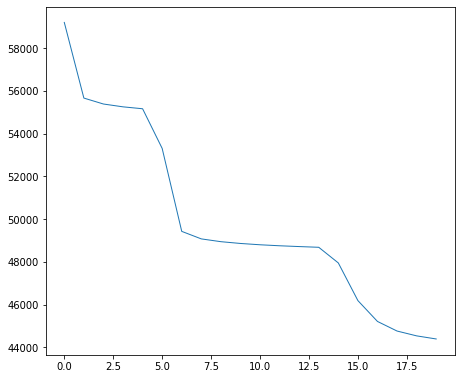

In [ ]:
import matplotlib.pyplot as plt

# График ошибки
fig = plt.figure(figsize=(12, 10), constrained_layout=True)
ax1 = fig.add_subplot(221)
ax1.plot(np.arange(len(error_arr)), error_arr, linewidth = 1)

Пакетный градиентный спуск

In [ ]:
number_of_epoches = 60
learning_rate = 0.02 #0.02
hidden_size = 7
batch_size = 1000

img_size=28

np.random.seed(1)

def relu(x):
    return (x > 0) * x # returns x if x > 0
                       # return 0 otherwise

def relu2deriv(output):
    return output>0 # returns 1 for input > 0
                    # return 0 otherwise
   

weights_0_1 = 2*np.random.random((img_size*img_size, hidden_size)) - 1 #веса между входным и скрытым слоями
weights_1_2 = 2*np.random.random((hidden_size, 10)) - 1 #веса между скрытым и выходным слоями 

n = len(train_images) // batch_size

error_arr2=[]

for iteration in range(number_of_epoches):

   for i in range(n):
      weight_1_2_corrections = np.zeros((hidden_size, 10))
      weight_0_1_corrections = np.zeros(((img_size*img_size, hidden_size)))
      
      error = 0

      for j in range(i*batch_size, i*batch_size+batch_size):
        #forward pass
        layer_0 = train_images[j:j+1]                 
        layer_1 = relu(np.dot(layer_0,weights_0_1))   
        layer_2 = np.dot(layer_1,weights_1_2)         

        error += np.sum((layer_2 - one_hot(train_labels[j])) ** 2)

        #backward pass
        layer_2_delta = layer_2 - one_hot(train_labels[j:j+1])
        weight_1_2_corrections += layer_1.T.dot(layer_2_delta) #величина коррекции для весов между layer_1 и layer_2

        layer_1_delta = layer_2_delta.dot(weights_1_2.T) * relu2deriv(layer_1)
        weight_0_1_corrections += layer_0.T.dot(layer_1_delta)

      weights_1_2 -= learning_rate * (weight_1_2_corrections / batch_size)
      weights_0_1 -= learning_rate * (weight_0_1_corrections / batch_size)
   
   error_arr2.append(error)
   print("Error:", error)

Error: 1210.8155784633911
Error: 1041.7464468021558
Error: 997.0998373444392
Error: 979.3355109587856
Error: 970.4458593944001
Error: 965.3555272727161
Error: 961.9516474526217
Error: 959.4062654626644
Error: 957.4439637709793
Error: 955.9004203548466
Error: 954.6704520601793
Error: 953.6542625375097
Error: 952.7629074451038
Error: 951.9431452315876
Error: 951.2040452432525
Error: 950.5309667735927
Error: 949.9078772472966
Error: 949.3338453223673
Error: 948.79843443167
Error: 948.3063177634565
Error: 947.8541834492756
Error: 947.4335962250381
Error: 947.0246570767338
Error: 946.637758577814
Error: 946.2817213567761
Error: 945.9249684891297
Error: 945.581216606616
Error: 945.2395167935999
Error: 944.9089720956941
Error: 944.5911753287972
Error: 944.284319540804
Error: 943.9885373728276
Error: 943.6981995373143
Error: 943.4102716896956
Error: 943.1188684414338
Error: 942.8136741399023
Error: 942.5147268801265
Error: 942.2181375862057
Error: 941.900514695685
Error: 941.5635580101219
Erro

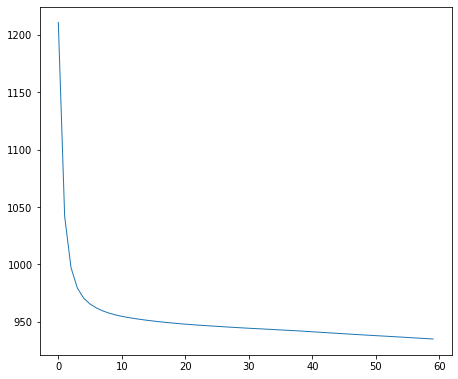

In [ ]:
import matplotlib.pyplot as plt

# График ошибки
fig = plt.figure(figsize=(12, 10), constrained_layout=True)
ax1 = fig.add_subplot(221)
ax1.plot(np.arange(len(error_arr2)), error_arr2, linewidth = 1)

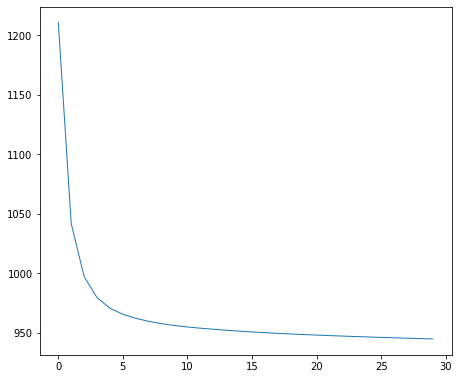

Количество эпох мало влияет на ошибку(если увеличивать больше чем 20)

При этом все остальные параметры достаточно чувствительны